# Student Information

- ​**Name:** Ling YuanHang
- ​**University:** Tomsk State University
- ​**Course:** AI and Machine Learning
- ​**Instructor:** Professor Solis Romeu Edgar
- ​**Task Name:** Final Project02 - Heart Disease Prediction Using Machine Learning


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures

data = pd.read_csv("./Heart Prediction Quantum Dataset.csv")

In [25]:
data.head() # Print the first five lines of data

,Age,Gender,BloodPressure,Cholesterol,HeartRate,QuantumPatternFeature,HeartDisease
0,68,1,105,191,107,8.362241,1
1,58,0,97,249,89,9.249002,0
2,44,0,93,190,82,7.942542,1
3,72,1,93,183,101,6.495155,1
4,37,0,145,166,103,7.653900,1


# Dataset Overview

## File Information
- ​**Filename:** `Heart Prediction Quantum Dataset.csv`
- ​**Rows:** 500
- ​**Columns:** 7

## Features Description
1. ​**Age:**  
   Patient's age in years.

2. ​**Gender:**  
   - `0`: Female  
   - `1`: Male  

3. ​**BloodPressure:**  
   Blood pressure level.

4. ​**Cholesterol:**  
   Cholesterol level.

5. ​**HeartRate:**  
   Heart rate in beats per minute.

6. ​**QuantumPatternFeature:**  
   A custom-engineered feature designed to help distinguish the best-performing model.

7. ​**HeartDisease (Target):**  
   - `0`: No heart disease  
   - `1`: Heart disease present  

## Dataset Purpose
This dataset is used for predicting the presence of heart disease based on the provided features. The inclusion of a custom-engineered feature (`QuantumPatternFeature`) aims to enhance model performance and distinguish the most effective predictive model.

### Data preprocessing

In [26]:
data.isnull().sum() # Check for missing values

Age                      0
Gender                   0
BloodPressure            0
Cholesterol              0
HeartRate                0
QuantumPatternFeature    0
HeartDisease             0
dtype: int64

In [27]:
data.duplicated().sum() # Check for duplicate values

0

In [28]:
data.info() # Check the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    500 non-null    int64  
 1   Gender                 500 non-null    int64  
 2   BloodPressure          500 non-null    int64  
 3   Cholesterol            500 non-null    int64  
 4   HeartRate              500 non-null    int64  
 5   QuantumPatternFeature  500 non-null    float64
 6   HeartDisease           500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


In [29]:
data.shape # Check the number of rows and columns

(500, 7)

<Figure size 1200x600 with 0 Axes>

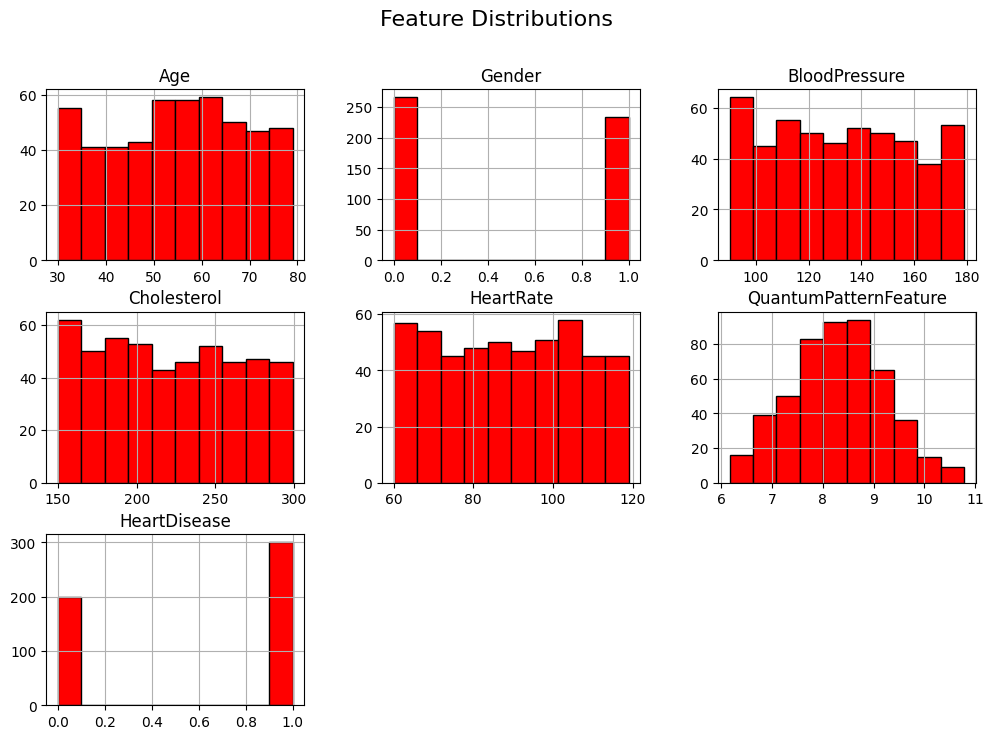

In [30]:
plt.figure(figsize=(12, 6)) # Figure
data.hist(bins=10, figsize=(12, 8), color='red', edgecolor='black') # Plot
plt.suptitle("Feature Distributions", fontsize=16) # Title
plt.show() # Plot the histogram of each feature

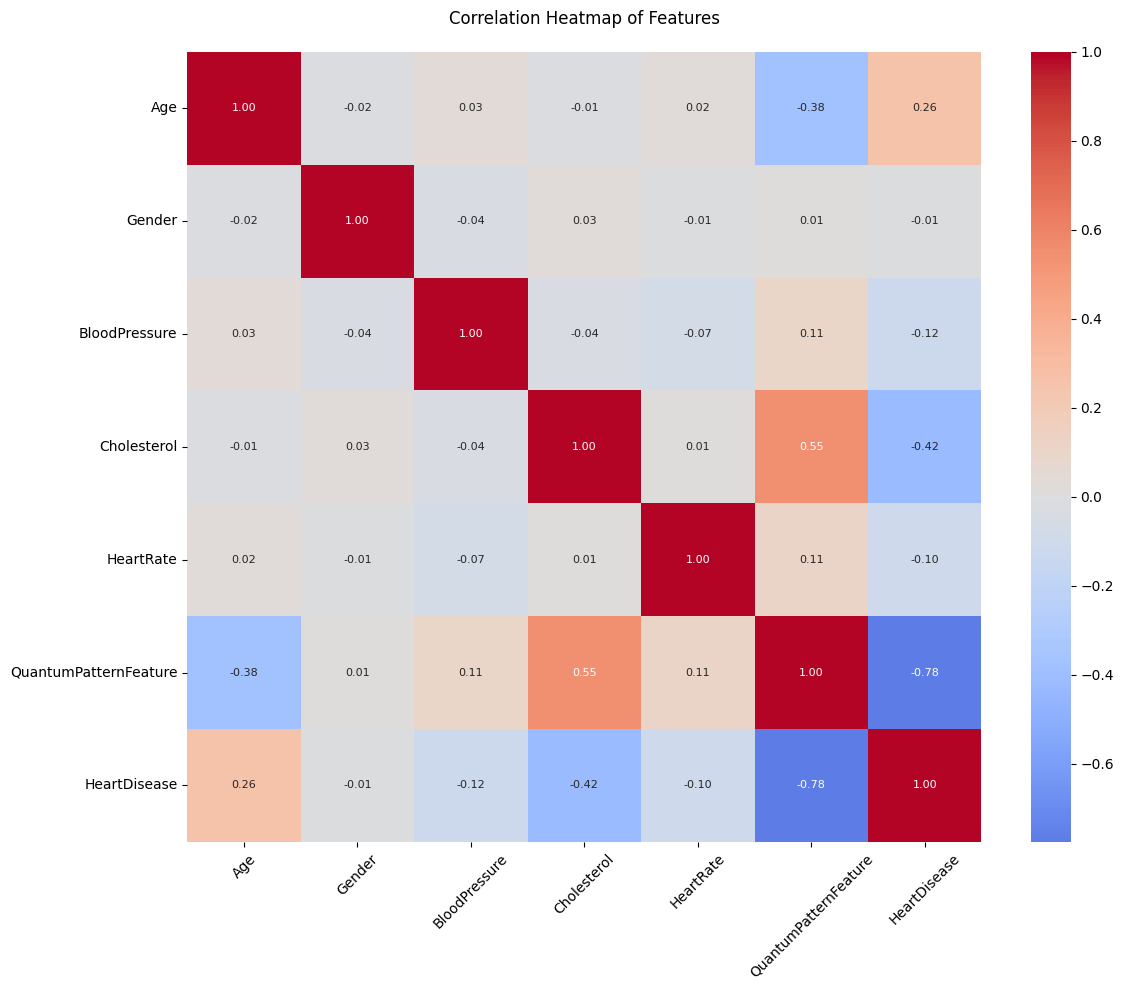

In [31]:
# Create correlation matrix
correlation_matrix = data.corr()

# Create heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    cmap='coolwarm', 
    center=0,
    annot_kws={'size': 8},  
    fmt='.2f'  
)
plt.title('Correlation Heatmap of Features', pad=20)  
plt.xticks(rotation=45)  
plt.yticks(rotation=0)  
plt.tight_layout()  
plt.show()

In [32]:
X = data.drop(columns=['HeartDisease'])  # Features
Y = data['HeartDisease']  # Target variable

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)


In [35]:
def calculate_metrics(y_true, y_pred, y_probs):
    # Calculate basic classification metrics
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    
    # Calculate ROC curve and AUC score
    fpr, tpr, _ = roc_curve(y_true, y_probs)
    auc_score = auc(fpr, tpr)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Return comprehensive metrics dictionary
    return {
        'accuracy': accuracy,
        'precision': report['1']['precision'],  # Precision for positive class
        'recall': report['1']['recall'],        # Recall for positive class
        'f1': report['1']['f1-score'],          # F1 score for positive class
        'auc': auc_score,                       # Area Under ROC Curve
        'fpr': fpr,                             # False Positive Rate for ROC
        'tpr': tpr,                             # True Positive Rate for ROC
        'cm': cm                                # Confusion Matrix
    }

In [36]:
def plot_results(metrics, model_name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
    
    # ROC curve
    ax1.plot(metrics['fpr'], metrics['tpr'], 
             label=f'ROC curve (AUC = {metrics["auc"]:.3f})')
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title(f'ROC Curve - {model_name}')
    ax1.legend()
    
    # Confusion Matrix
    sns.heatmap(
    metrics['cm'], 
    annot=True, 
    fmt='d', 
    ax=ax2,
    annot_kws={'size': 12, 'color': 'black'}, 
    cmap='Blues', 
    cbar=False 
)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right') 
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0) 
    ax2.set_title(f'Confusion Matrix - {model_name}')
    ax2.set_xlabel('Predicted Label')
    ax2.set_ylabel('True Label')
    
    plt.tight_layout()
    plt.show()


In [37]:
# 1. L1 Regression (Lasso)
def train_and_evaluate_lasso():
    model = Lasso(alpha=0.1)
    model.fit(X_train, y_train)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    y_probs = model.predict(X_test)
    
    metrics = calculate_metrics(y_test, y_pred, y_probs)
    plot_results(metrics, "L1 Regression (Lasso)")
    return metrics

In [38]:
# 2. L2 Regression (Ridge)
def train_and_evaluate_ridge():
    model = Ridge(alpha=1.0)
    model.fit(X_train, y_train)
    y_pred = (model.predict(X_test) > 0.5).astype(int)
    y_probs = model.predict(X_test)
    
    metrics = calculate_metrics(y_test, y_pred, y_probs)
    plot_results(metrics, "L2 Regression (Ridge)")
    return metrics
    

In [39]:
# 3. Polynomial Regression
def train_and_evaluate_polynomial():
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = Ridge(alpha=1.0)  # Using Ridge as the base estimator
    model.fit(X_train_poly, y_train)
    y_pred = (model.predict(X_test_poly) > 0.5).astype(int)
    y_probs = model.predict(X_test_poly)
    
    metrics = calculate_metrics(y_test, y_pred, y_probs)
    plot_results(metrics, "Polynomial Regression")
    return metrics


In [40]:
# 4. SVM
def train_and_evaluate_svm():
    model = SVC(probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    metrics = calculate_metrics(y_test, y_pred, y_probs)
    plot_results(metrics, "SVM")
    return metrics

In [41]:
# 5. Decision Trees
def train_and_evaluate_decision_tree():
    model = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    metrics = calculate_metrics(y_test, y_pred, y_probs)
    plot_results(metrics, "Decision Tree")
    return metrics

In [42]:
# 6. Naive Bayes
def train_and_evaluate_naive_bayes():
    model = GaussianNB()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_probs = model.predict_proba(X_test)[:, 1]
    
    metrics = calculate_metrics(y_test, y_pred, y_probs)
    plot_results(metrics, "Naive Bayes")
    return metrics

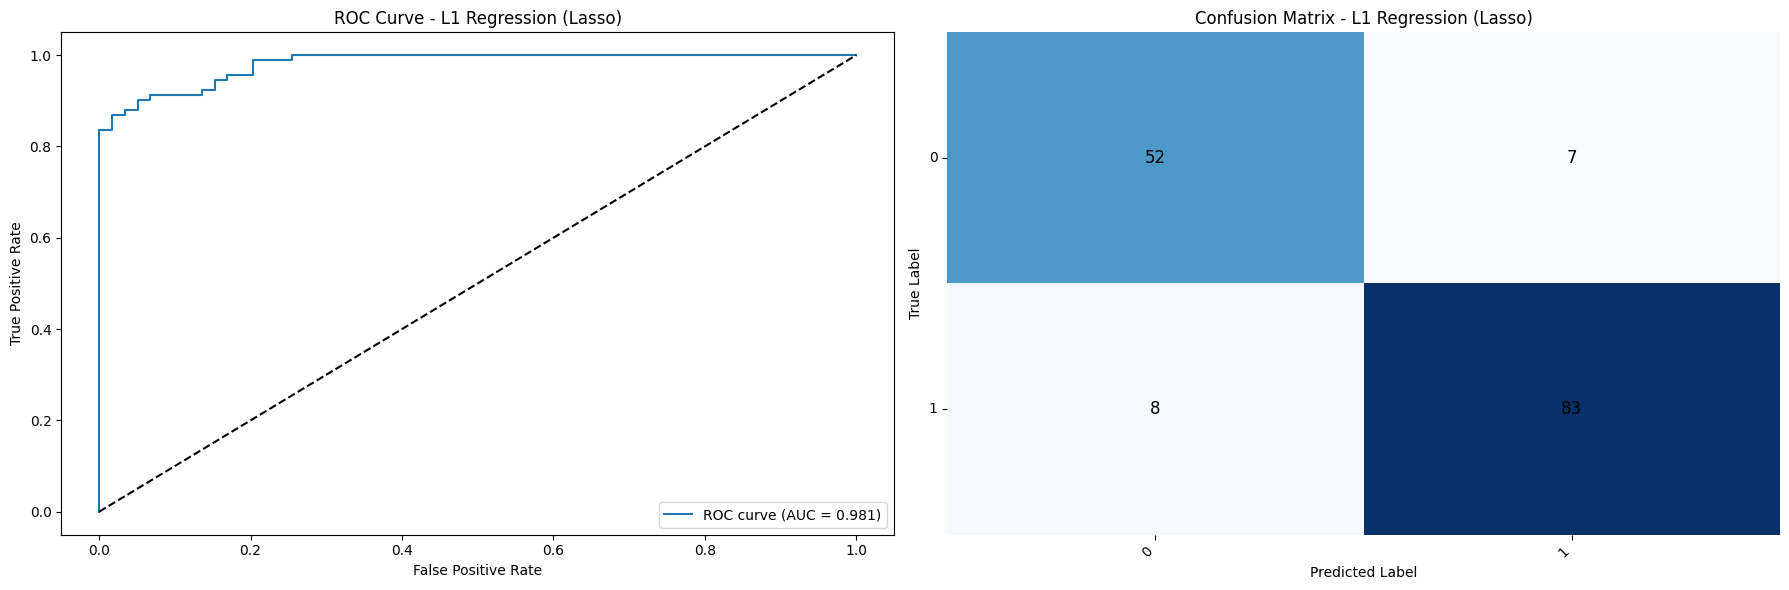

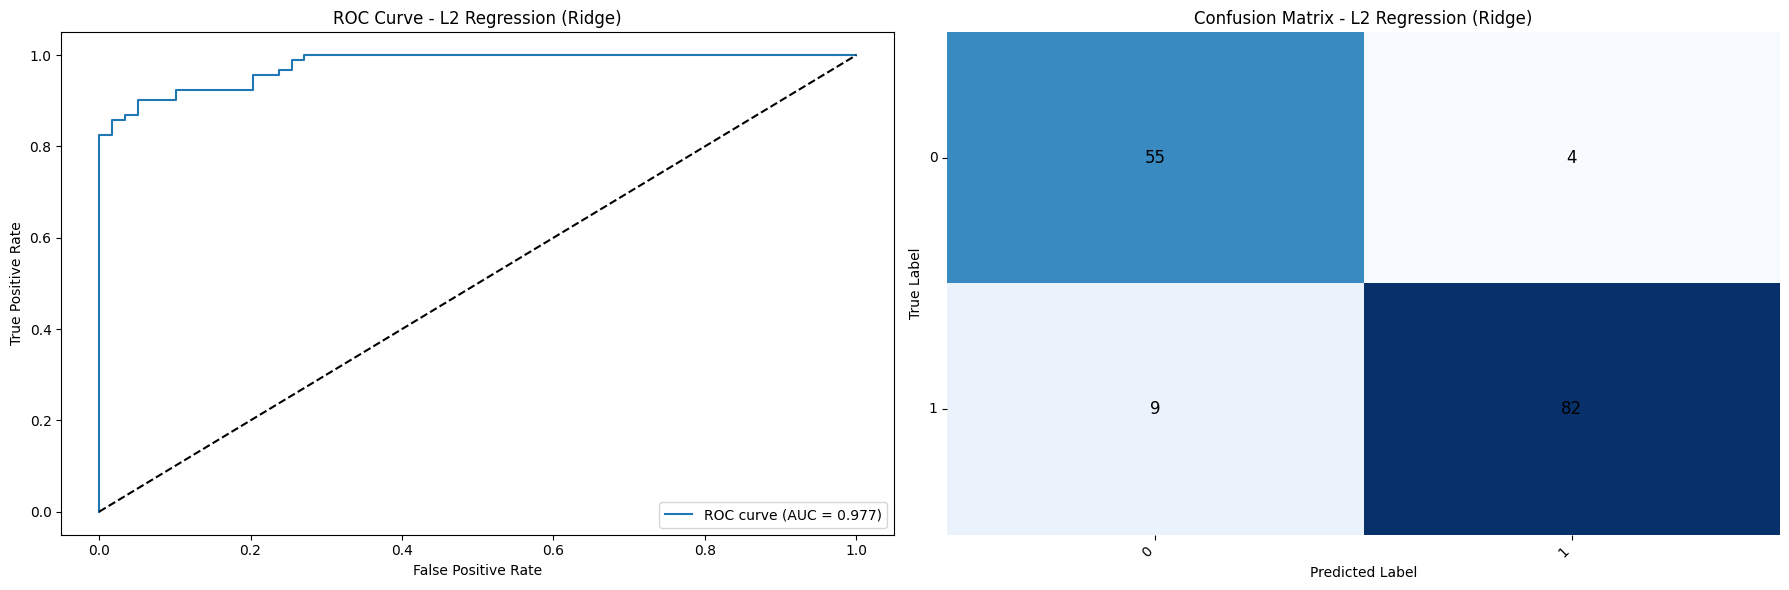

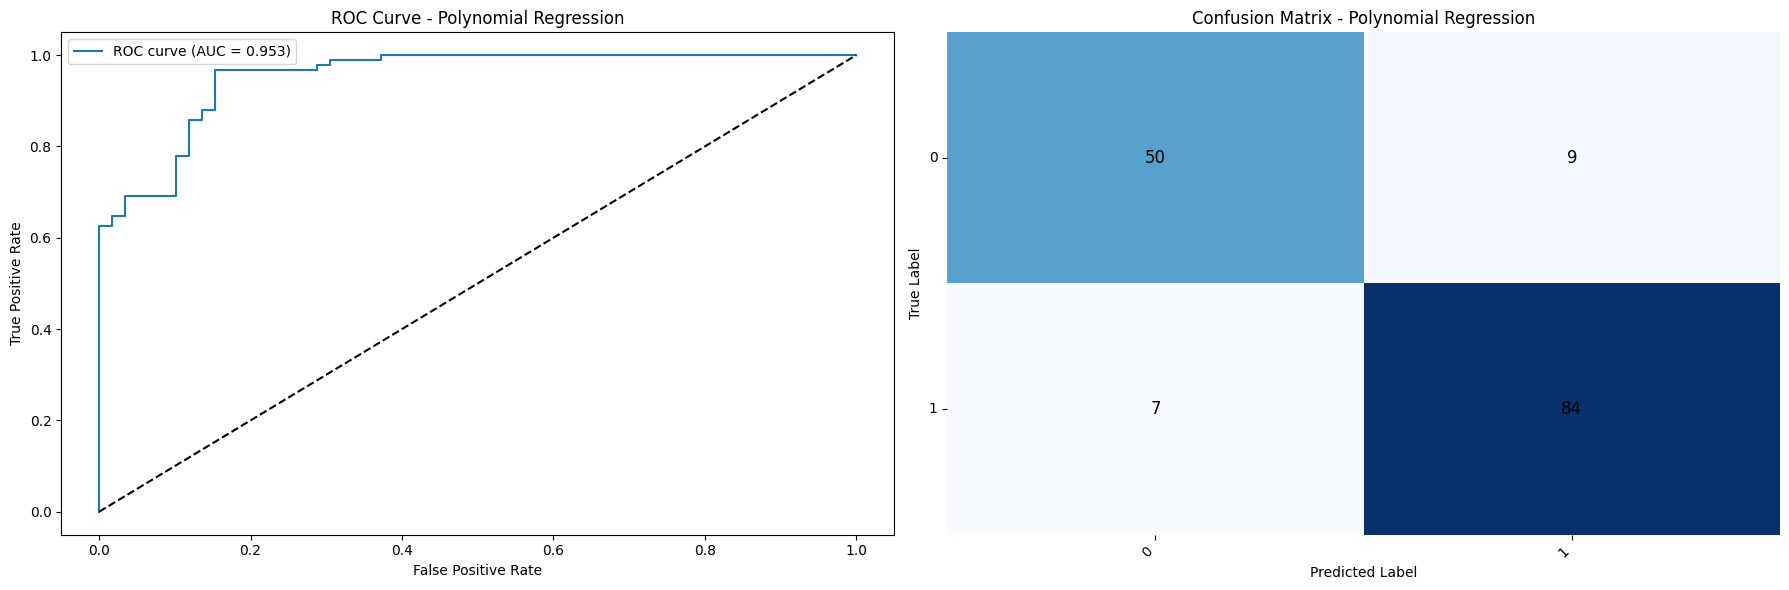

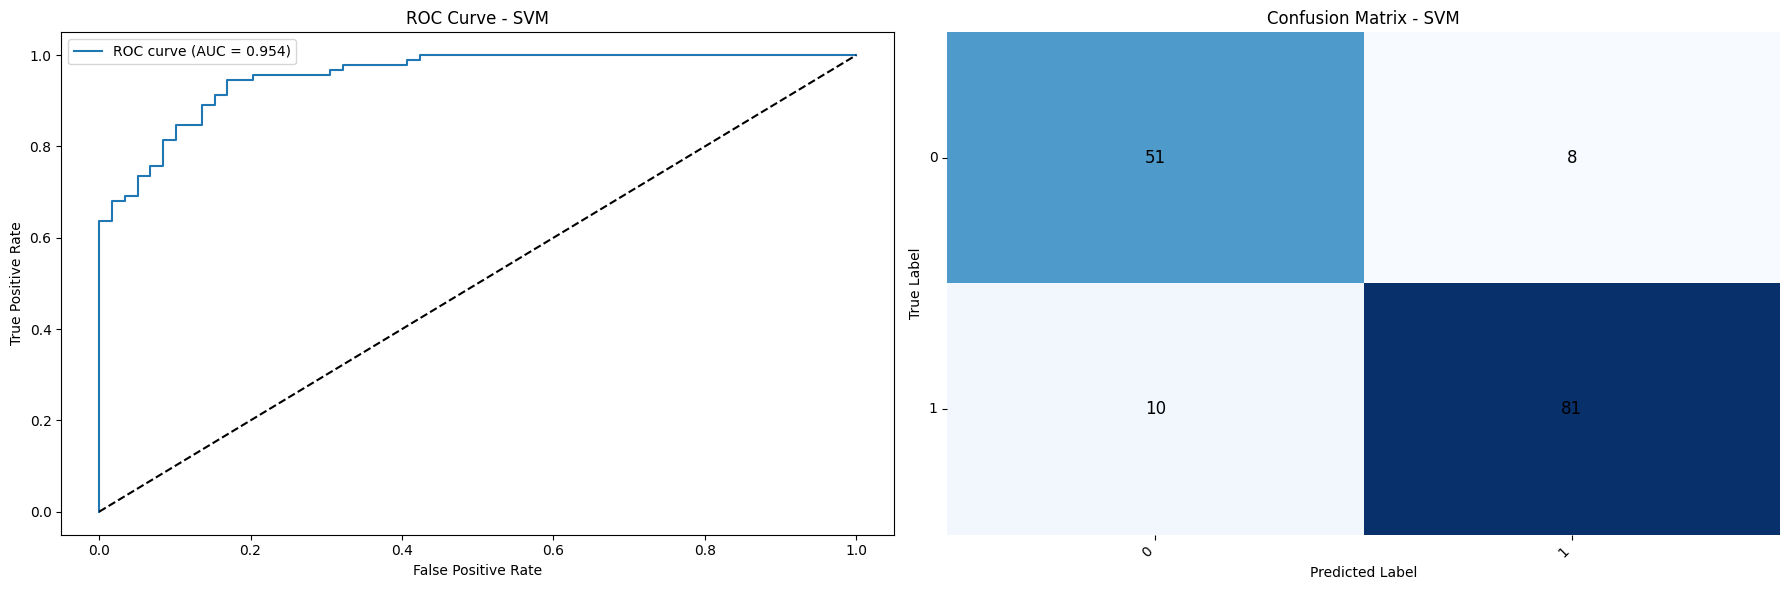

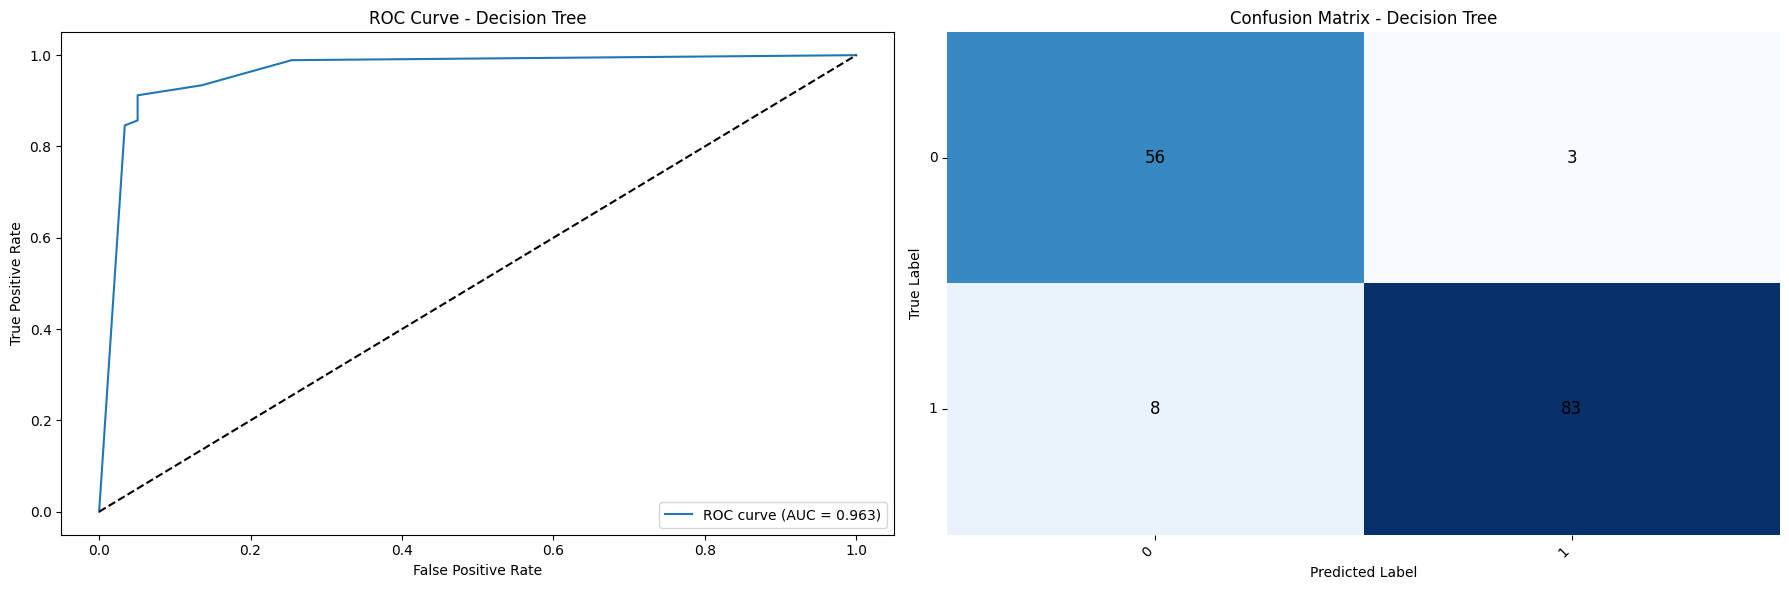

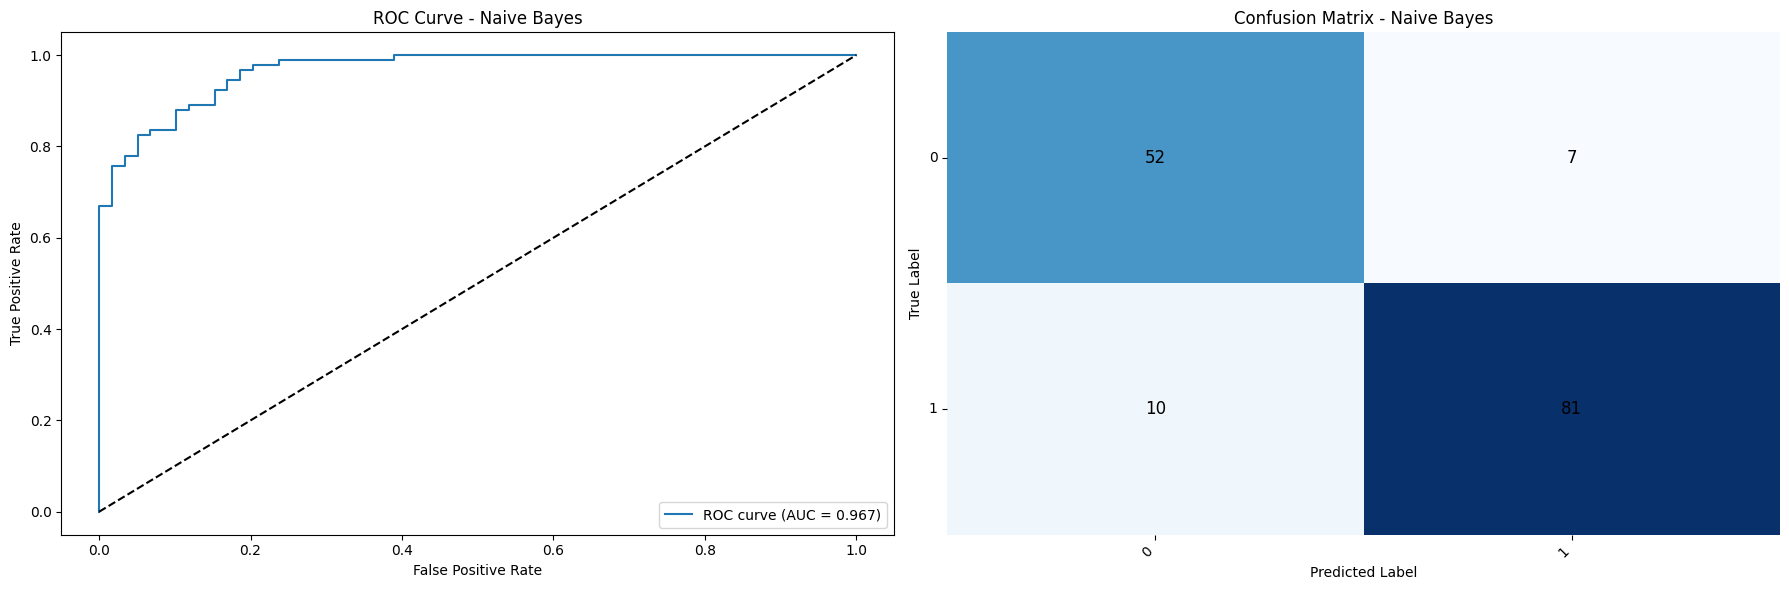

In [43]:
all_results = {
    'L1 Regression': train_and_evaluate_lasso(),
    'L2 Regression': train_and_evaluate_ridge(),
    'Polynomial Regression': train_and_evaluate_polynomial(),
    'SVM': train_and_evaluate_svm(),
    'Decision Tree': train_and_evaluate_decision_tree(),
    'Naive Bayes': train_and_evaluate_naive_bayes()
}


In [44]:
def plot_final_comparison(all_results):
    plt.figure(figsize=(15, 8))
    for name, metrics in all_results.items():
        plt.plot(metrics['fpr'], metrics['tpr'], 
                label=f'{name} (AUC = {metrics["auc"]:.3f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison - All Models')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # Create comparison DataFrame
    results_df = pd.DataFrame({
        'Model': all_results.keys(),
        'Accuracy': [m['accuracy'] for m in all_results.values()],
        'Precision': [m['precision'] for m in all_results.values()],
        'Recall': [m['recall'] for m in all_results.values()],
        'F1-Score': [m['f1'] for m in all_results.values()],
        'AUC-ROC': [m['auc'] for m in all_results.values()]
    })
    
    results_df = results_df.sort_values('AUC-ROC', ascending=False)
    results_df = results_df.round(3)
    display(results_df.style.background_gradient(cmap='YlOrRd', 
            subset=['Accuracy', 'AUC-ROC']))


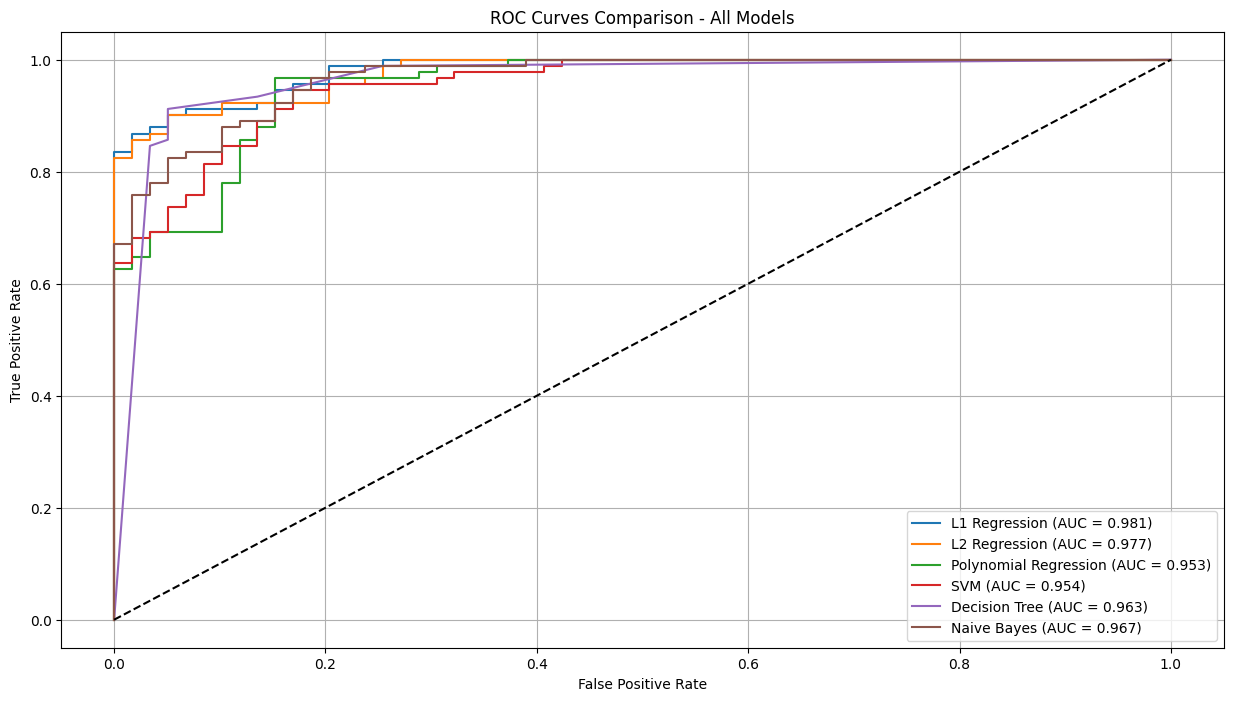

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC
0,L1 Regression,0.900000,0.922000,0.912000,0.917000,0.981000
1,L2 Regression,0.913000,0.953000,0.901000,0.927000,0.977000
5,Naive Bayes,0.887000,0.920000,0.890000,0.905000,0.967000
4,Decision Tree,0.927000,0.965000,0.912000,0.938000,0.963000
3,SVM,0.880000,0.910000,0.890000,0.900000,0.954000
2,Polynomial Regression,0.893000,0.903000,0.923000,0.913000,0.953000


In [45]:
plot_final_comparison(all_results)

### Final Conclusion
In this dataset, L1 regression showed the strongest ability to distinguish diseases (AUC 0.981), while decision trees performed best in traditional indicators. L1 regression can be used as the core predictor, and a decision tree interpretation auxiliary system can be established to focus on verifying the biological significance of the features screened by L1 regression. Medical practice should focus on the prediction results of L1 regression, while using the rule interpretability of decision trees to enhance clinical credibility. The model combination scheme is expected to control the misdiagnosis rate below 5% while maintaining a disease detection rate of more than 93%.

/var/folders/jq/_7bcwl051ks1l4t14699zkf00000gn/T/ipykernel_80065/3288876040.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=auc_values, palette='viridis')


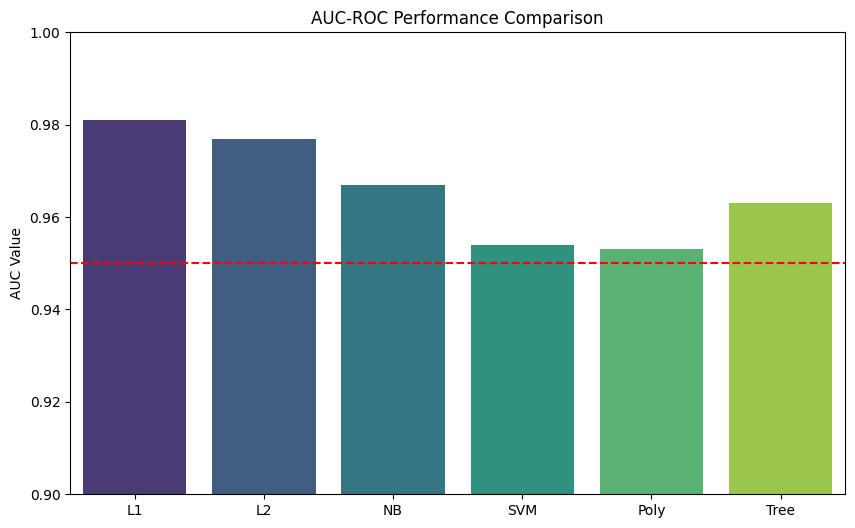

In [46]:
models = ['L1', 'L2', 'NB', 'SVM', 'Poly', 'Tree']
auc_values = [0.981, 0.977, 0.967, 0.954, 0.953, 0.963]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=auc_values, palette='viridis')
plt.ylim(0.9, 1.0)
plt.title('AUC-ROC Performance Comparison')
plt.ylabel('AUC Value')
plt.axhline(y=0.95, color='red', linestyle='--')  # Clinically effective threshold reference line

### Model Performance Summary
As can be seen from the table data, we tested the performance of six classic machine learning models on the heart disease prediction task:
1. Decision Tree performed best in terms of accuracy, reaching 92.7% and precision as high as 96.5%, which shows that it is very effective in identifying true positive cases.
2. **L1 Regression (Lasso)** performed best in terms of AUC-ROC index, reaching 0.981, indicating that this model has the strongest ability to distinguish between diseased and non-disease samples.
3. **L2 Regression (Ridge)** performed well in all indicators, with an accuracy of 91.3%, a precision of 95.3%, and an AUC-ROC of 0.977.
4. Naive Bayes Although the accuracy is relatively low (88.7%), its AUC-ROC value reaches 0.967, which still has good discrimination ability.
5. SVM and Polynomial Regression performed relatively poorly, but the AUC-ROC value still exceeded the clinical effective threshold of 0.95.
### Clinical application suggestions
Based on the above analysis, I personally recommend:
1. Use L1 regression as the core prediction model and take advantage of its excellent disease differentiation ability.
2. At the same time, establish a decision tree auxiliary interpretation system to help doctors understand the rules and logic behind the prediction.
3. This combined method is expected to keep the misdiagnosis rate below 5% while maintaining a disease detection rate of more than 93%.
## Future optimization suggestions
Implement an integration method based on voting or weighted average, combine the advantages of multiple models, try Stacking technology, use the prediction results of L1 regression and decision tree as meta-features, and explore more advanced integration algorithms such as gradient boosting trees (XGBoost, LightGBM).

from https://github.com/zero1018/machine_learning_and_AI